## 实验要求
### 截止日期：12月15日
作业的提交格式参考之前的说明，提交到18329300691@163.com
### 基本要求
a)	基于 Watermelon-train1数据集（只有离散属性），构造ID3决策树；
b)	基于构造的 ID3 决策树，对数据集 Watermelon-test1进行预测，输出分类精度；
### 中级要求
a)  对数据集Watermelon-train2，构造C4.5或者CART决策树，要求可以处理连续型属性；
b)	对测试集Watermelon-test2进行预测，输出分类精度；
### 高级要求
使用任意的剪枝算法对构造的决策树（基本要求和中级要求构造的树）进行剪枝，观察测试集合的分类精度是否有提升，给出分析过程。



## 什么是决策树

决策树是一种常用的机器学习方法，主要用于分类和回归任务。其核心思想是基于数据特征构建树形结构模型，以实现数据分类或预测。决策树的主要特点包括：

1. **树形结构**：决策树由节点和分支构成。每个内部节点代表一个特征或属性，每个分支代表这个特征的一个可能值，而每个叶节点代表一个类别或结果。

2. **决策规则**：从根节点开始，根据测试数据的特征，沿着树向下走，直到达到叶节点，叶节点的类别即为数据的分类结果。

3. **训练过程**：在构建决策树时，需要从数据集中学习决策规则。这通常涉及选择最佳特征来分割数据，并递归这个过程，直到满足停止条件（如达到预定深度，或节点中的数据不再具有多样性）。

4. **信息增益**：在选择特征进行分割时，通常会考虑信息增益或信息增益比。信息增益基于信息熵的概念，用于衡量特征对分类结果的影响程度。

5. **应用广泛**：决策树适用于各种类型的数据，如数值型和类别型数据。它们易于理解和解释，且可以可视化为树状图。

6. **剪枝**：为防止过拟合，决策树构建后常进行剪枝处理，即去掉部分分支以简化模型。

决策树的代表算法包括ID3、C4.5和CART等。它们在选择分割特征、处理不同类型的数据、以及剪枝策略等方面有所不同。决策树广泛应用于金融风险评估、医疗诊断、市场分析等领域。

## 决策树的划分
- 决策树主要分为三种：
	ID3，C4.5和CART，它们分别对应的**特征选择准则**是信息增益（ID3），信息增益比（C4.5）和基尼指数（CART）。
	它们决定当前选择哪个特征进行数据划分，使得样本在当下能够被最大程度的划分。
- 对于离散变量，选定**属性**分类即可；
- 对于连续变量，需要选定**划分点**。
- CART和C4.5支持数据特征为**连续分布**时的处理，能够完成对连续属性的离散化处理，主要通过二元切分的方式来处理连续型变量，这个分裂点的选择原则是使得划分后的子树中的“混乱程度”降低。

## ID3算法
- ID3算法的核⼼思想应用信息增益准则作为标准,介绍信息增益之前首先介绍一下信息熵和条件熵： 
- 熵（entropy）概念：
	    1948年，香农提出了“信息熵”的概念。在信息论与概率统计中，熵是表示随机变量不确定性的量。X是⼀个取值为有限个的离散随机变量，
$$ H(X)=-\sum_{i=1}^{n} p\left(x_{i}\right) \log p\left(x_{i}\right)$$ 
$𝐻(𝑋)$就被称作随机变量𝑋的熵，它表示随机变量不确定的度量。熵取值越大，随机变量不确定性越大。当随机变量为均匀分布时，熵最大。当某一状态概率取值为1时，熵的值为零。

### ID3算法-条件熵和信息增益
- 条件熵 $𝐻(𝑌∣𝑋)$ ：
	表示在已知随机变量𝑋的条件下随机变量𝑌的不确定性，定义为给定𝑋条件下𝑌的条件概率分布的熵对𝑋的数学期望:
$$H(Y \mid X)=\sum_{x} p(x) H(Y \mid X=x) =-\sum_{x} p(x) \sum_{y} p(y \mid x) \log p(y \mid x)$$

- 特征𝐴对数据集𝐷的信息增益就是熵$𝐻(𝐷)$与条件熵$𝐻(𝐷|𝐴)$之差:
$$𝐻(𝐷)−𝐻(𝐷∣𝐴)$$

	表示已知特征𝐴的信息而使得数据集𝐷的信息不确定减少的程度。信息增益越大的特征代表其具有更强的分类能力，所以我们就要**选择能够使数据的不确定程度减少最多的特征**，也就是信息增益最大的特征。

### ID3算法-停止条件
- 决策树的生成:

	从根节点开始，计算所有可能特征的信息增益，选择信息增益最大的特征作为划分该节点的特征，根据该特征的不同取值建立子节点；
	在对子节点递归地调用以上方法，直到达到停止条件，得到⼀个决策树。
    
    
- 迭代停止条件：
  1. 当前结点所有样本都属于同⼀类别；
  2. 当前结点的所有属性值都相同，没有剩余属性可用来进一步划分样本；
  3. 达到最大树深；
  4. 达到叶子结点的最小样本数；

### ID3算法举例

<img src="https://s2.loli.net/2022/10/23/p7gSQeYGnoBCd2i.png" style="zoom:64%" />


$$
\begin{array}{l}
\operatorname{Info}^{\text {In }}(D)=-\frac{9}{14} \log _{2}\left(\frac{9}{14}\right)-\frac{5}{14} \log _{2}\left(\frac{5}{14}\right)=0.940 \\
\operatorname{Infoage~}(D)=\frac{5}{14} \times\left(-\frac{2}{5} \times \log _{2} \frac{2}{5}-\frac{3}{5} \times \log _{2} \frac{3}{5}\right)+\frac{4}{14} \times\left(-\frac{4}{4} \times \log _{2} \frac{4}{4}-\frac{0}{4} \times \log _{2} \frac{0}{4}\right) 
+\frac{5}{14} \times\left(-\frac{2}{5} \times \log _{2} \frac{2}{5}-\frac{3}{5} \times \log _{2} \frac{3}{5}\right)=0.694 \\
\text { Gain }(\text { age })=\operatorname{Info}(D)-\operatorname{InfO}_{\text {age }}(D) =0.940-0.694=0.246
\end{array}
$$

<img src="https://s2.loli.net/2022/10/23/1zAnHWKRgQ9FaJV.png" style="zoom:72%" />
类似地，
Gain(income)=0.029    
Gain(student)=0.151    
Gain(credit_rating)=0.048

所以，选择age作为第一个根节点

## C4.5算法
- C4.5算法与ID3算法相似，其对ID3算法进行了改进。
- 信息增益作为划分准则存在的问题：

     信息增益偏向于选择取值较多的特征进行划分。⽐如学号这个特征，每个学生都有一个不同的学号，如果根据学号对样本进行分类，则每个学生都属于不同的类别，这样是没有意义的。而C4.5在生成过程中，用**信息增益比**来选择特征，可以校正这个问题。
     
- 特点
  - 能够完成对连续属性的离散化处理
  - 能够对不完整数据进行处理
  - 需要对数据集进行多次的顺序扫描和排序

## CART算法
- ID3和C4.5虽然在对训练样本集的学习中可以尽可能多的挖掘信息，但其生成的决策树分支较大，规模较大。为了简化决策树的规模，提高生成决策树的效率，就出现了根据**基尼指数**来选择的CART； 
- 对于给定的样本集合 ，其基尼指数为： $$ {Gini}(D)=1-\sum_{k=1}^{K}\left(\frac{\left|C_{k}\right|}{|D|}\right)^{2} $$
   其中$𝐶_𝑘$是𝐷中属于第𝑘类的样本子集，K是类的个数。
- 基尼系数的性质与信息熵一样：
   度量随机变量的不确定度的大小；基尼指数越⼩表示数据的纯度越高，反之其值越大，样本集合的不确定性也就越大。

## 决策树的剪枝
- 决策树很容易出现**过拟合现象**。原因在于学习时完全考虑的是如何提⾼对训练数据的正确分类从⽽构建出过于复杂的决策树。
- 解决这个问题的方法称为**剪枝**，即对已生成的树进行简化。具体地，就是从已生成的树上裁剪掉⼀些子树或叶节点，并将其根节点或父节点作为新的叶节点。 
- 决策树的剪枝基本策略有**预剪枝 (Pre-Pruning)** 和 **后剪枝 (Post-Pruning)**
   - **预剪枝**：是根据⼀些原则**极早的停止树增长**，如树的深度达到用户所要的深度、节点中样本个数少于用户指定个数、不纯度指标下降的幅度小于用户指定的幅度等。 
   - **后剪枝**：是通过在完全生长的树上剪去分枝实现的，通过删除节点的分支来剪去树节点。是在生成决策树之后**自底向上**的对树中所有的非叶结点进⾏逐一考察 。

In [1]:
# 引入头文件
import pandas as pd
from math import log2

In [2]:
# Load Data
encoding = 'GBK' # 由于数据集是中文 需要特定的编码支持
train1_path = 'Watermelon-train1.csv'
test1_path = 'Watermelon-test1.csv'
train2_path = 'Watermelon-train2.csv'
test2_path = 'Watermelon-test2.csv'
train1_df = pd.read_csv(train1_path,encoding=encoding)
test1_df = pd.read_csv(test1_path,encoding=encoding)
train2_df = pd.read_csv(train2_path,encoding=encoding)
test2_df = pd.read_csv(test2_path,encoding=encoding)
train1_df.head(), test1_df.head(),train2_df.head(), test2_df.head()

(   编号  色泽  根蒂  敲声  纹理 好瓜
 0   1  青绿  蜷缩  浊响  清晰  是
 1   2  乌黑  蜷缩  沉闷  清晰  是
 2   3  乌黑  蜷缩  浊响  清晰  是
 3   4  青绿  蜷缩  沉闷  清晰  是
 4   5  浅白  蜷缩  浊响  清晰  是,
    编号  色泽  根蒂  敲声  纹理 好瓜
 0   1  浅白  蜷缩  浊响  清晰  是
 1   2  乌黑  稍蜷  沉闷  清晰  是
 2   3  乌黑  蜷缩  沉闷  清晰  是
 3   4  青绿  蜷缩  沉闷  稍糊  是
 4   5  浅白  蜷缩  浊响  清晰  是,
    编号  色泽  根蒂  敲声  纹理     密度 好瓜
 0   1  青绿  蜷缩  浊响  清晰  0.697  是
 1   2  乌黑  蜷缩  沉闷  清晰  0.774  是
 2   3  乌黑  蜷缩  浊响  清晰  0.634  是
 3   4  青绿  蜷缩  沉闷  清晰  0.608  是
 4   5  浅白  蜷缩  浊响  清晰  0.556  是,
    编号  色泽  根蒂  敲声  纹理     密度 好瓜
 0   1  乌黑  稍蜷  浊响  清晰  0.403  是
 1   2  青绿  稍蜷  浊响  稍糊  0.481  是
 2   3  乌黑  稍蜷  浊响  清晰  0.337  是
 3   4  乌黑  稍蜷  沉闷  稍糊  0.666  否
 4   5  青绿  硬挺  清脆  清晰  0.243  否)

In [3]:
# 计算信息增益以及信息熵 展示对应信息

def calculate_entropy(data, target):
    value_counts = data[target].value_counts()
    entropy = sum([-count/len(data) * log2(count/len(data)) for count in value_counts])
    return entropy

def calculate_information_gain(data, attribute, target):
    total_entropy = calculate_entropy(data, target)
    values = data[attribute].unique()
    weighted_entropy = sum([len(data[data[attribute] == value])/len(data) * calculate_entropy(data[data[attribute] == value], target) for value in values])
    information_gain = total_entropy - weighted_entropy
    return information_gain

target_attribute = '好瓜'
info_gains_train1 = {col: calculate_information_gain(train1_df, col, target_attribute) for col in train1_df.columns if col != target_attribute}

info_gains_train1



{'编号': 1.0,
 '色泽': 0.17379494069539847,
 '根蒂': 0.14778299853751742,
 '敲声': 0.1800365325772657,
 '纹理': 0.5026152487479011}

## 基础要求

### ID3决策树的实现

In [9]:
# 计算某个目标属性的熵
def calculate_entropy_id3(data, target):
    value_counts = data[target].value_counts()
    entropy = sum([-count/len(data) * log2(count/len(data)) if count != 0 else 0 for count in value_counts])
    return entropy
# 计算某个目标属性的信息增益
def calculate_information_gain_id3(data, attribute, target):
    total_entropy = calculate_entropy_id3(data, target)
    values = data[attribute].unique()
    weighted_entropy = sum([len(data[data[attribute] == value])/len(data) * calculate_entropy_id3(data[data[attribute] == value], target) for value in values])
    information_gain = total_entropy - weighted_entropy
    return information_gain

# 递归建树
def build_id3_tree(data, target, attributes):
    if len(set(data[target])) == 1:
        return data[target].iloc[0]
    if not attributes:
        return data[target].mode()[0]

    # 选择信息增益最大的那个进行向下延拓
    best_attr = max(attributes, key=lambda attr: calculate_information_gain_id3(data, attr, target))
    tree = {best_attr: {}}
    remaining_attributes = [attr for attr in attributes if attr != best_attr]

    for value in data[best_attr].unique():
        subset = data[data[best_attr] == value]
        subtree = build_id3_tree(subset, target, remaining_attributes)
        tree[best_attr][value] = subtree

    return tree

attributes_id3 = [col for col in train1_df.columns if col not in [target_attribute, '编号']]
id3_tree = build_id3_tree(train1_df, target_attribute, attributes_id3)

id3_tree



{'纹理': {'清晰': {'根蒂': {'蜷缩': '是', '稍蜷': '是', '硬挺': '否'}},
  '稍糊': {'色泽': {'乌黑': {'敲声': {'浊响': '是', '沉闷': '否'}}, '青绿': '否', '浅白': '否'}},
  '模糊': '否'}}

我们构建出的决策树可视化的结果如下所示：
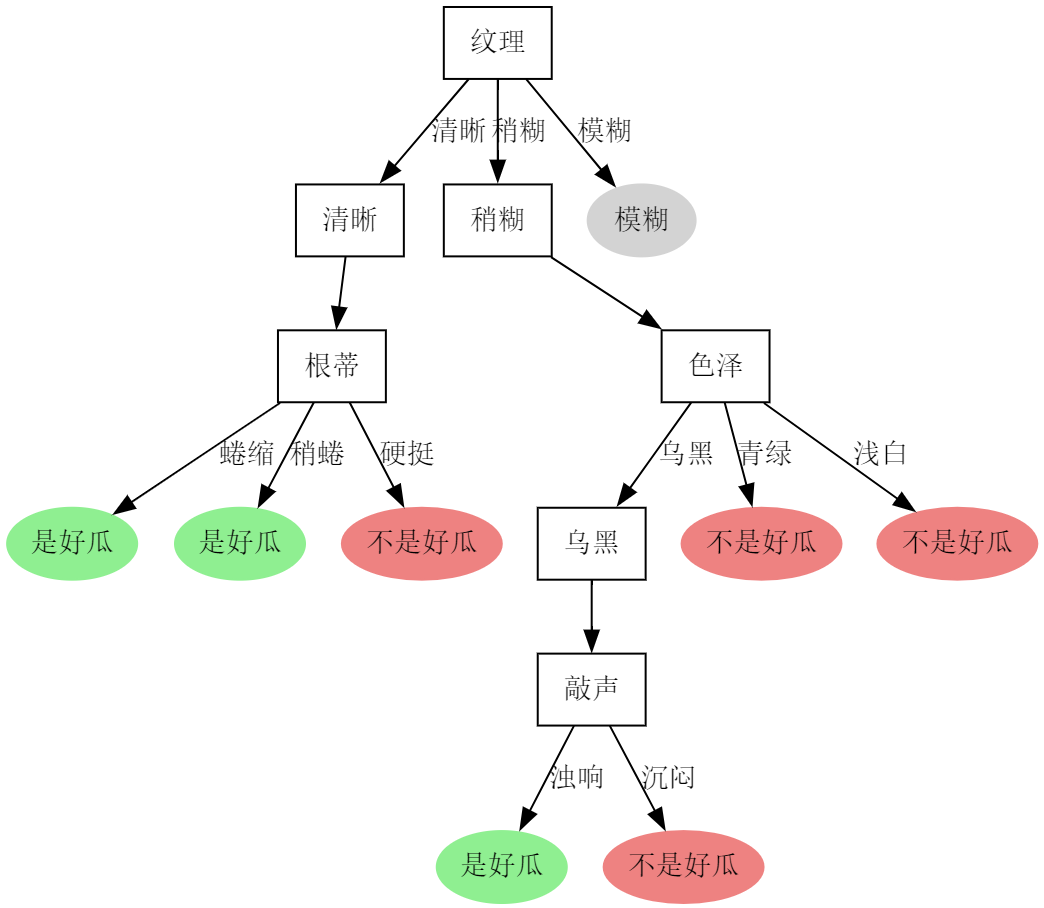

In [10]:
# 使用ID3决策树进行预测
def predict_with_id3_tree(tree, instance):
    if not isinstance(tree, dict):
        return tree
    attribute = next(iter(tree))
    if attribute in instance and instance[attribute] in tree[attribute]:
        subtree = tree[attribute][instance[attribute]]
        return predict_with_id3_tree(subtree, instance)
    else:
        return None  


def calculate_accuracy_id3(data, tree, target):
    correct_predictions = 0
    for _, row in data.iterrows():
        prediction = predict_with_id3_tree(tree, row)
        if prediction == row[target]:
            correct_predictions += 1
    return correct_predictions / len(data)


accuracy_test1_id3 = calculate_accuracy_id3(test1_df, id3_tree, target_attribute)
accuracy_test1_id3



0.7

我们使用决策树进行决策的条件是target_attribute是好瓜，也就是说，我们要判断在我们的决策树下，我们通过特征不断的判断和分层，从根节点通过一条树链，直到根节点，最后看根节点的分类结果和我们目标的结果是否一致，然后我们遍历整个数据集判断准确率。

我们可以看到，ID3的准确率在70%左右，相对而言，我觉得准确率还是挺高的，我们通过自顶向下递归性的方法构建决策树

## 中级要求 实现CART以及C4.5决策树

### CART决策树的实现

In [4]:
# CART决策树是由gini指数进行建树
def calculate_gini(data, target):
    value_counts = data[target].value_counts()
    gini = 1 - sum([(count/len(data))**2 for count in value_counts])
    return gini

def calculate_gini_split(data, attribute, target):
    unique_values = data[attribute].unique()
    gini_split = 0

    for value in unique_values:
        subset = data[data[attribute] == value]
        gini_subset = calculate_gini(subset, target)
        gini_split += len(subset) / len(data) * gini_subset

    return gini_split

target_attribute = '好瓜'
gini_indices_train2 = {col: calculate_gini_split(train2_df, col, target_attribute) for col in train2_df.columns if col != target_attribute}

gini_indices_train2



{'编号': 0.0,
 '色泽': 0.42745098039215684,
 '根蒂': 0.42226890756302526,
 '敲声': 0.4235294117647059,
 '纹理': 0.2771241830065359,
 '密度': 0.0}

In [5]:
def find_best_split_for_continuous_attribute(data, attribute, target):
    unique_values = sorted(data[attribute].unique())
    best_gini = float("inf")
    best_split = None

    for i in range(len(unique_values) - 1):
        split_value = (unique_values[i] + unique_values[i + 1]) / 2
        left_subset = data[data[attribute] <= split_value]
        right_subset = data[data[attribute] > split_value]

        gini_left = calculate_gini(left_subset, target)
        gini_right = calculate_gini(right_subset, target)

        weighted_gini = len(left_subset) / len(data) * gini_left + len(right_subset) / len(data) * gini_right

        if weighted_gini < best_gini:
            best_gini = weighted_gini
            best_split = split_value

    return best_split, best_gini

best_split_density, gini_density = find_best_split_for_continuous_attribute(train2_df, '密度', target_attribute)
best_split_density, gini_density



(0.3815, 0.3619909502262443)

上述代码中函数 `find_best_split_for_continuous_attribute` 的目的是在构建决策树时找到连续属性的最佳分割点，以最小化基尼不纯度（Gini index）。这对于处理连续变量非常重要，因为不像离散变量，连续变量不能直接根据其不同的值来分割数据。

1. **排序唯一值**：函数首先对给定属性的所有唯一值进行排序。

2. **遍历所有可能的分割点**：然后，它会遍历这些值，每次考虑相邻两个值之间的中点作为潜在的分割点。

3. **计算基尼不纯度**：对于每个分割点，数据集被分成两部分：一个部分的属性值小于或等于分割点，另一个部分的属性值大于分割点。函数计算每个子集的基尼不纯度。

4. **计算加权基尼不纯度**：然后，它计算这两个子集的加权基尼不纯度，加权因子是每个子集的大小与整个数据集大小的比例。

5. **选择最佳分割点**：函数会选择使加权基尼不纯度最小化的分割点。这意味着该分割点在划分数据时可以达到最佳的纯度改善。

6. **返回结果**：最后，函数返回最佳分割点和相应的加权基尼不纯度值。

在决策树（如CART算法）中处理连续属性时，这种寻找最佳分割点的方法非常关键，因为它直接影响树的结构和最终的分类性能。在你提供的代码中，这个函数被用来找到属性 '密度' 的最佳分割点，以及在该点的基尼不纯度。

In [6]:
# 建立对应的CART决策树

def build_cart_tree(data, target, attributes, continuous_attributes):
    """Builds a CART decision tree recursively."""
    # If all target values are the same, return this value
    if len(set(data[target])) == 1:
        return data[target].iloc[0]

    # If no more attributes, return the most common target value
    if not attributes:
        return data[target].mode()[0]

    # Select the best attribute (continuous or discrete)
    best_gini = float("inf")
    best_attr = None
    best_split = None  # Only used for continuous attributes
    is_continuous = False

    for attr in attributes:
        if attr in continuous_attributes:
            split, gini = find_best_split_for_continuous_attribute(data, attr, target)
            if gini < best_gini:
                best_gini = gini
                best_attr = attr
                best_split = split
                is_continuous = True
        else:
            gini = calculate_gini_split(data, attr, target)
            if gini < best_gini:
                best_gini = gini
                best_attr = attr
                is_continuous = False

    # Build the tree recursively
    tree = {best_attr: {}}

    if is_continuous:
        # Handle continuous attribute
        left_subset = data[data[best_attr] <= best_split]
        right_subset = data[data[best_attr] > best_split]

        # Recur for left and right subsets
        tree[best_attr]['<=' + str(best_split)] = build_cart_tree(left_subset, target, attributes, continuous_attributes)
        tree[best_attr]['>' + str(best_split)] = build_cart_tree(right_subset, target, attributes, continuous_attributes)
    else:
        # Handle discrete attribute
        remaining_attributes = [attr for attr in attributes if attr != best_attr]
        for value in data[best_attr].unique():
            subset = data[data[best_attr] == value]
            subtree = build_cart_tree(subset, target, remaining_attributes, continuous_attributes)
            tree[best_attr][value] = subtree

    return tree

# Attributes excluding the target and the '编号' column
attributes_cart = [col for col in train2_df.columns if col not in [target_attribute, '编号']]
continuous_attributes_cart = ['密度']

# Build the CART tree
cart_tree = build_cart_tree(train2_df, target_attribute, attributes_cart, continuous_attributes_cart)
cart_tree



{'纹理': {'清晰': {'密度': {'<=0.3815': '否', '>0.3815': '是'}},
  '稍糊': {'密度': {'<=0.56': '是', '>0.56': '否'}},
  '模糊': '否'}}

我们给出对应生成的决策树的可视化图，我们可以看到，相比于ID3，CART决策树对于密度等属性有了数值上的划分，也就是说对于属性是连续的情况下，CART是可以处理的，可以计算最佳分割点作为决策边界。

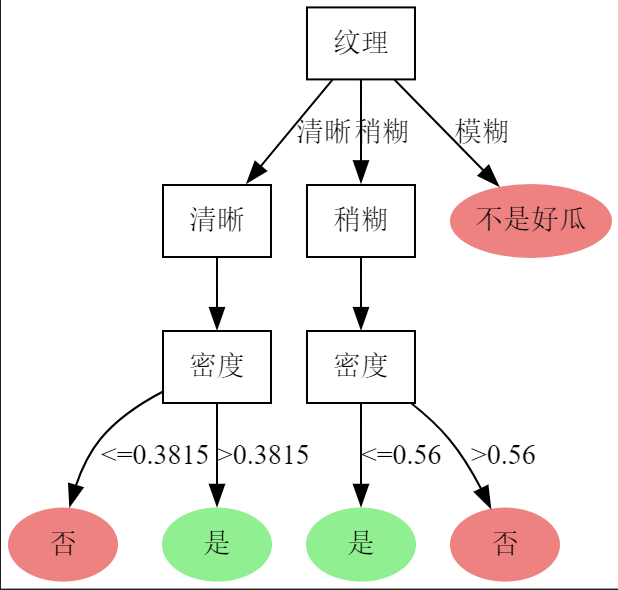

In [8]:
def predict_with_cart_tree(tree, sample):
    if not isinstance(tree, dict):
        return tree  

    for attr, subtree in tree.items():
        if attr in sample:
            value = sample[attr]
            if isinstance(subtree, dict):
                if any(key.startswith('<=') or key.startswith('>') for key in subtree.keys()):
                    threshold = float(list(subtree.keys())[0][2:])
                    if (value <= threshold and '<=' + str(threshold) in subtree):
                        return predict_with_cart_tree(subtree['<=' + str(threshold)], sample)
                    elif (value > threshold and '>' + str(threshold) in subtree):
                        return predict_with_cart_tree(subtree['>' + str(threshold)], sample)
                else:
                    if value in subtree:
                        return predict_with_cart_tree(subtree[value], sample)
            else:
                return subtree
    return None


def test_cart_tree_accuracy(tree, test_data, target_attribute):
    correct_predictions = 0
    for _, row in test_data.iterrows():
        predicted = predict_with_cart_tree(tree, row)
        if predicted == row[target_attribute]:
            correct_predictions += 1

    accuracy = correct_predictions / len(test_data)
    return accuracy

accuracy = test_cart_tree_accuracy(cart_tree, test2_df, target_attribute)
accuracy


0.8

相应的，我们根据建立的树进行决策，我们发现，在测试集上的准确率达到了80%，比ID3更高一些，我们考虑原因：
1. ID3原生不支持连续变量，需要将连续变量离散化才能使用，这可能会导致信息丢失。相比之下，CART原生支持连续变量，并能更有效地处理这类数据。
2. ID3使用信息增益作为分割标准，而CART使用基尼不纯度（对于分类问题）或均方误差（对于回归问题）。基尼不纯度通常被认为对数据集中的小类别更为敏感，这可能导致CART在某些数据集上表现更好。
3.  ID3对噪声和异常值比较敏感，因为一个异常值可能导致信息增益极大。相比之下，CART的基尼不纯度对噪声的抵抗力更强。

In [108]:
# 接下来我们实现C4.5决策树

def calculate_gain_ratio(data, attribute, target):
    total_entropy = calculate_entropy_id3(data, target)
    subsets = [data[data[attribute] == value] for value in data[attribute].unique()]
    weighted_entropy = sum([len(subset)/len(data) * calculate_entropy_id3(subset, target) for subset in subsets])
    information_gain = total_entropy - weighted_entropy

    split_info = -sum([len(subset)/len(data) * log2(len(subset)/len(data)) if len(subset) != 0 else 0 for subset in subsets])

    if split_info == 0:
        return 0

    gain_ratio = information_gain / split_info
    return gain_ratio

def find_best_attribute_c45(data, attributes, target, continuous_attributes):
    best_gain_ratio = 0
    best_attribute = None
    best_split = None

    for attribute in attributes:
        if attribute in continuous_attributes:
            # 对于连续属性，找到最佳切分点
            split, gain_ratio = find_best_split_for_continuous_attribute(data, attribute, target)
            if gain_ratio > best_gain_ratio:
                best_gain_ratio = gain_ratio
                best_attribute = attribute
                best_split = split
        else:
            # 离散属性的处理保持不变
            gain_ratio = calculate_gain_ratio(data, attribute, target)
            if gain_ratio > best_gain_ratio:
                best_gain_ratio = gain_ratio
                best_attribute = attribute

    return best_attribute, best_split

def build_c45_tree(data, target, attributes, continuous_attributes):
    if len(data[target].unique()) == 1:
        return data[target].iloc[0]
    if not attributes:
        return data[target].mode()[0]

    best_gain_ratio = 0
    best_attribute = None
    best_split = None
    is_continuous = False

    for attribute in attributes:
        if attribute in continuous_attributes:
            split, gain_ratio = find_best_split_for_continuous_attribute(data, attribute, target)
            if gain_ratio > best_gain_ratio:
                best_gain_ratio = gain_ratio
                best_attribute = attribute
                best_split = split
                is_continuous = True
        else:
            gain_ratio = calculate_gain_ratio(data, attribute, target)
            if gain_ratio > best_gain_ratio:
                best_gain_ratio = gain_ratio
                best_attribute = attribute
                is_continuous = False

    tree = {best_attribute: {}}
    remaining_attributes = [attr for attr in attributes if attr != best_attribute]

    if is_continuous:
        left_subset = data[data[best_attribute] <= best_split]
        right_subset = data[data[best_attribute] > best_split]
        tree[best_attribute]['<=' + str(best_split)] = build_c45_tree(left_subset, target, remaining_attributes, continuous_attributes)
        tree[best_attribute]['>' + str(best_split)] = build_c45_tree(right_subset, target, remaining_attributes, continuous_attributes)
    else:
        for value in data[best_attribute].unique():
            subset = data[data[best_attribute] == value]
            subtree = build_c45_tree(subset, target, remaining_attributes, continuous_attributes)
            tree[best_attribute][value] = subtree

    return tree


# 从特征列表中移除'编号'
continuous_attributes_c45 = ['密度']
attributes_c45 = [col for col in train2_df.columns if col != target_attribute and col != '编号']

# 使用更新后的特征列表构建C4.5决策树
c45_tree = build_c45_tree(train2_df, target_attribute, attributes_c45, continuous_attributes_c45)

# 预测并计算测试集的准确率
accuracy_test2_c45 = calculate_accuracy_id3(test2_df, c45_tree, target_attribute)

c45_tree



{'密度': {'<=0.3815': '否',
  '>0.3815': {'纹理': {'清晰': '是',
    '稍糊': {'敲声': {'浊响': {'色泽': {'乌黑': '是', '青绿': '否'}}, '沉闷': '否'}},
    '模糊': '否'}}}}

我们通过c45构建出的决策树如下所示：

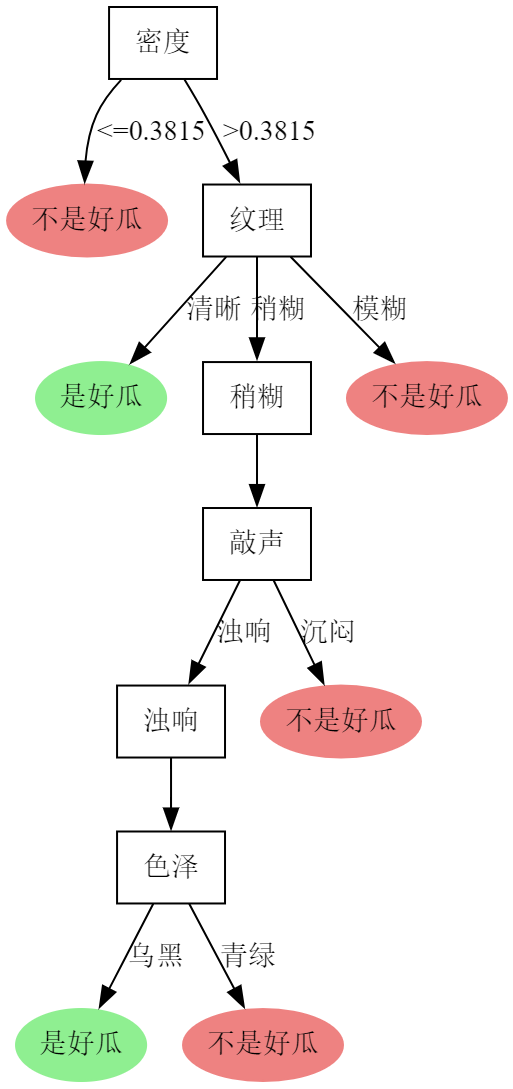

In [94]:
def predict_with_c45_tree(tree, sample, continuous_attributes):
    if not isinstance(tree, dict):
        return tree  # 如果是叶节点直接返回结果

    for attr, subtree in tree.items():
        if attr not in sample or not isinstance(subtree, dict):  # 检查样本中是否有该属性，且子树是否为字典
            return most_common_class(tree)  # 如果没有该属性或子树不是字典，返回整棵树中最常见的类别

        if attr in continuous_attributes:
            value = sample[attr]
            split_point_key = next((key for key in subtree if key.startswith('<=') or key.startswith('>')), None)
            if split_point_key is None:
                continue  # 如果没有找到合适的分割点键，继续下一个属性

            split_point = float(split_point_key[2:])
            if value <= split_point and '<=' + str(split_point) in subtree:
                return predict_with_c45_tree(subtree['<=' + str(split_point)], sample, continuous_attributes)
            elif value > split_point and '>' + str(split_point) in subtree:
                return predict_with_c45_tree(subtree['>' + str(split_point)], sample, continuous_attributes)
        else:
            value = sample[attr]
            if value in subtree:
                return predict_with_c45_tree(subtree[value], sample, continuous_attributes)
            else:
                return most_common_class(tree)  # 如果没有匹配的分支，返回整棵树中最常见的类别

    return most_common_class(tree)  # 如果没有匹配的属性，返回整棵树中最常见的类别



def calculate_accuracy_c45(test_data, tree, target_attribute, continuous_attributes):
    """计算C4.5决策树在测试数据上的准确率。"""
    correct_predictions = 0
    for _, row in test_data.iterrows():
        predicted = predict_with_c45_tree(tree, row, continuous_attributes)
        if predicted == row[target_attribute]:
            correct_predictions += 1

    accuracy = correct_predictions / len(test_data)
    return accuracy


In [89]:
continuous_attributes_c45 = ['密度']  

# 计算准确率
accuracy_test2_c45 = calculate_accuracy_c45(test2_df, c45_tree, target_attribute, continuous_attributes_c45)
print(f"C4.5 Decision Tree Accuracy on Test Data: {accuracy_test2_c45}")


C4.5 Decision Tree Accuracy on Test Data: 0.6


## 提高要求，实现树的剪枝算法


In [110]:
def prune_tree(tree, validation_data, target_attribute, continuous_attributes):
    if not isinstance(tree, dict):
        return tree

    # 如果节点已经是叶节点，则直接返回
    if len(tree) == 1 and not isinstance(next(iter(tree.values())), dict):
        return tree

    # 对每个子树递归剪枝
    for attr, subtree in tree.items():
        if isinstance(subtree, dict):
            tree[attr] = prune_tree(subtree, validation_data, target_attribute, continuous_attributes)

    # 计算当前树的准确率
    accuracy_before_pruning = calculate_accuracy_c45(validation_data, tree, target_attribute, continuous_attributes)
    # 计算剪枝后（将当前节点转换为最常见类别的叶节点）的准确率
    majority_class = validation_data[target_attribute].mode()[0]
    tree_as_leaf = {list(tree.keys())[0]: majority_class}
    accuracy_after_pruning = calculate_accuracy_c45(validation_data, tree_as_leaf, target_attribute, continuous_attributes)
    # 如果剪枝后的准确率更高或相等，则进行剪枝
    if accuracy_after_pruning > accuracy_before_pruning:
        return majority_class
    else:
        return tree


In [112]:
pruned_tree = prune_tree(cart_tree, train2_df, target_attribute, continuous_attributes_c45)
pruned_tree

{'纹理': {'清晰': {'密度': {'<=0.3815': '否', '>0.3815': '是'}},
  '稍糊': {'密度': '否'},
  '模糊': '否'}}

我们发现，哪怕是实现了剪枝算法，我们对于cart_tree进行剪枝的时候，仍然会存在没有办法剪枝的情况下，我们推测这是因为：数据集特征的原因，也就是说对于我们的数据集，噪声较少、特征与目标变量关系明确的数据集，完全生长的树(我们构建出的CART以及C4.5)可能已经是最优的。在这种情况下，剪枝可能不会带来任何改进。

# 总结

在本次实验中，我们主要探索了决策树在机器学习中的应用，特别是C4.5和CART决策树的构建和剪枝过程。以下是实验的关键点总结：

1. **C4.5决策树构建**：
   - C4.5算法支持连续和离散属性。
   - 使用信息增益率选择最佳属性进行分裂。
   - 没有实现预剪枝，树会完全生长直到满足特定条件（如无更多属性可分或所有目标值相同）。

2. **CART决策树构建**：
   - CART算法同样支持连续和离散属性。
   - 使用基尼不纯度作为分裂标准。
   - 类似于C4.5，CART树也会完全生长直到满足停止条件。
3. **ID3决策树构建**
    - ID3算法主要用于处理分类问题。
    - 它使用信息增益作为标准来选择每个分裂点的属性。
    - ID3主要处理离散属性，对于连续属性，需要先进行离散化。
3. **决策树剪枝**：
   - 探索了后剪枝方法，旨在防止过拟合，提高模型在未见数据上的泛化能力。
   - 后剪枝是在树完全生成后，根据验证数据集的性能来决定是否删除某些分支。
   - 在实验中，剪枝条件可能过于保守，导致剪枝后的树与原始树相同。

4. **遇到的问题**：
   - 我们在处理数据集时，总遇到不一致导致的 `KeyError` 问题。
   - 调整剪枝算法以避免过度剪枝。在这里，我们有一次剪枝的结果就只剩下了一个否，我觉得这个是因为数据集中数据量太少的原因。
   - 确保剪枝算法正确实现，适当调整剪枝条件。

5. **实验结果和洞察**：
   - 实验显示决策树的构建和剪枝对于提高模型性能是关键。
   - 验证数据集的选择对剪枝过程影响显著(采取train和test进行验证完全不一样...)。
   - 不同的数据集和任务可能需要不同的剪枝策略。
